# Exercise

**(1)** Verify which of the returns is riskier (apple or dow jones)

**(2)** Use the dow jones and Apple data to design an optimal headging strategy for a long exposure on apple shares

**(3)** Test the hypothesis that the intercept of the linear model is zero

In [1]:
library(readxl)
library(here)
library(car)

dados = read_excel(here('src', "data", "Dados_aula2.xlsx"), sheet='Planilha2')

Warning message:
"package 'here' was built under R version 3.6.3"here() starts at C:/Users/Daniel/Desktop/Daniel/codes/python/FGV_Financial_Econometrics
Warning message:
"package 'car' was built under R version 3.6.3"Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"

In [2]:
head(dados)

Data,DJIA,Apple,SP500
1999-12-31,11497.12,0.7932525,1469.26
2000-01-03,11357.51,0.8636567,1455.22
2000-01-04,10997.93,0.7908414,1399.42
2000-01-05,11122.65,0.8024147,1402.11
2000-01-06,11253.26,0.7329750,1403.45
2000-01-07,11522.56,0.7676949,1441.47


In [7]:
apple = (diff(dados$Apple)/lag(dados$Apple))*100
snp = (diff(dados$SP500)/lag(dados$SP500))*100
dj = (diff(dados$DJIA)/lag(dados$DJIA))*100

Warning message in diff(dados$Apple)/lag(dados$Apple):
"longer object length is not a multiple of shorter object length"Warning message in diff(dados$SP500)/lag(dados$SP500):
"longer object length is not a multiple of shorter object length"Warning message in diff(dados$DJIA)/lag(dados$DJIA):
"longer object length is not a multiple of shorter object length"

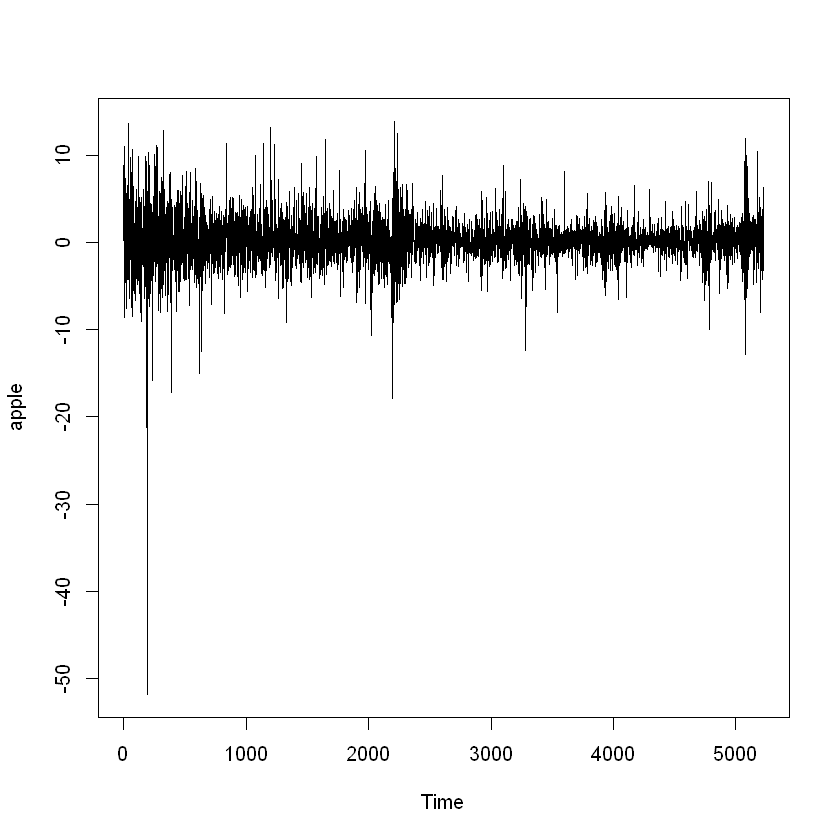

In [8]:
ts.plot(apple)

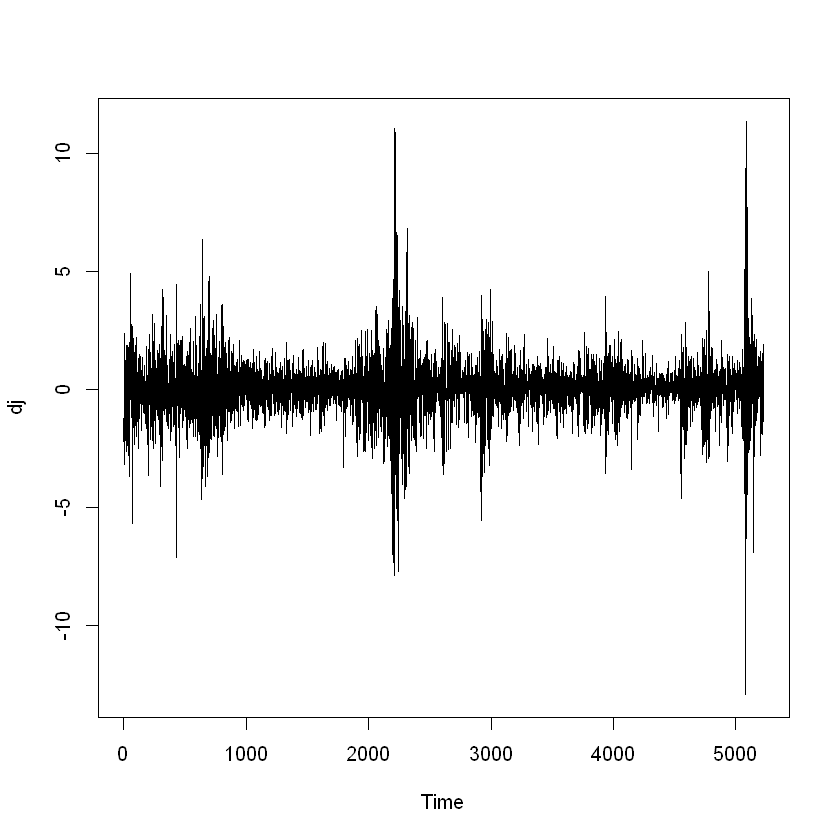

In [9]:
ts.plot(dj)

## *(1)*

Assuming the sample variance as a measure of risk of an asset, lets calculate it for the returns of the apple shares and dow jones index

In [18]:
print(paste0('variance of the dow jones returns: ' , var(dj), ' variance of the apple shares returns: ', var(apple)))

[1] "variance of the dow jones returns: 1.4572113669178 variance of the apple shares returns: 6.5922574066783"


The variance of the apple shares is higher than the same metric for the dow jones index. Therefore, we can conclude that the apple shares are riskier than the dow index.

## *(2)*

According to Brooks Brooks (2014) many authors consider that the goal of headging is to minimize the variance of the headged portfolio. Since the OLS estimator is the one that minimizes the sum of the squared error between the portfolio return and the estimated portfolio return (which is close to the variance), we can interpret the OLS estimator as the amount of units of the hedge asset that we need to buy/sell in order to hedge the portfolio. 

In our case, we assume that our portfolio consists of Apple shares, and we want to compare a hedging strategy using dow jones index and, as an extra comparison, we would like to check which of the indeces are better hedges for the apple shares.

## Model 1

$$
apple_t = \alpha + \beta DJ_t + \epsilon_t
$$

In [19]:
regressao_df2 = lm(apple ~ dj)
summary(regressao_df2)


Call:
lm(formula = apple ~ dj)

Residuals:
    Min      1Q  Median      3Q     Max 
-50.254  -0.944  -0.054   0.927  14.212 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.10411    0.03065   3.397 0.000686 ***
dj           1.07481    0.02538  42.342  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.216 on 5228 degrees of freedom
Multiple R-squared:  0.2554,	Adjusted R-squared:  0.2552 
F-statistic:  1793 on 1 and 5228 DF,  p-value: < 2.2e-16


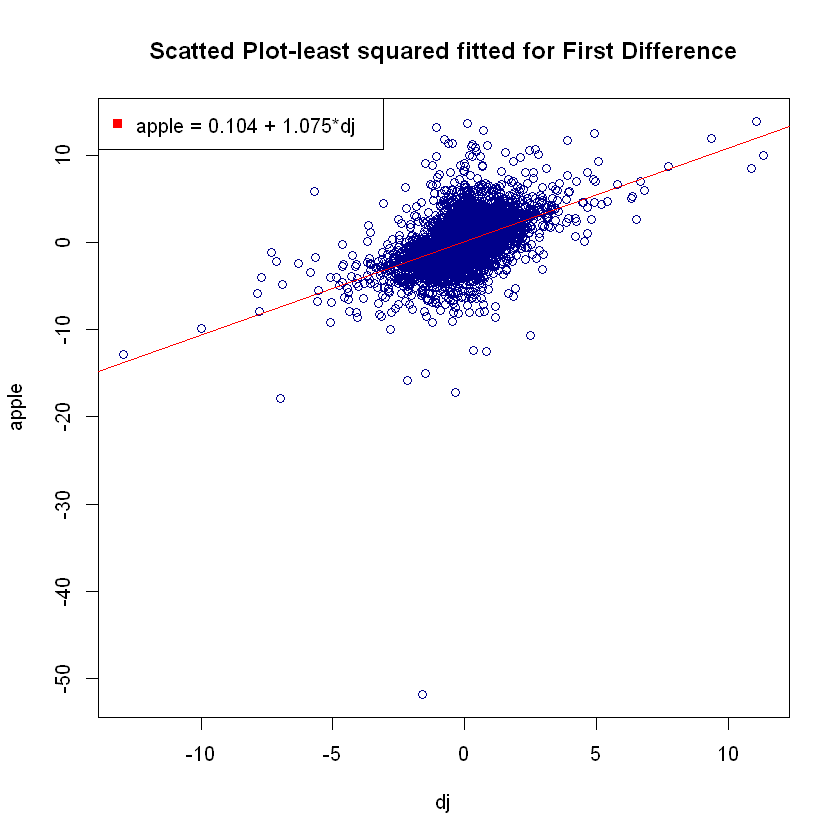

In [20]:
plot.default(dj, apple, col='darkblue')
abline(coef(regressao_df2), col='red')
legend('topleft', legend=c(paste0('apple = ', round(regressao_df2$coefficients[1], 3), ' + ', round(regressao_df2$coefficients[2], 3), '*dj')), col=c('red'), pch=15)
title('Scatted Plot-least squared fitted for First Difference')

## Model 2 (extra)

$$
apple_t = \alpha + \beta sp500_t + \epsilon_t
$$

In [21]:
regressao_df = lm(apple ~ snp)
summary(regressao_df)


Call:
lm(formula = apple ~ snp)

Residuals:
    Min      1Q  Median      3Q     Max 
-50.280  -0.926  -0.071   0.869  14.108 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.10291    0.02957    3.48 0.000505 ***
snp          1.13290    0.02355   48.10  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.138 on 5228 degrees of freedom
Multiple R-squared:  0.3068,	Adjusted R-squared:  0.3067 
F-statistic:  2314 on 1 and 5228 DF,  p-value: < 2.2e-16


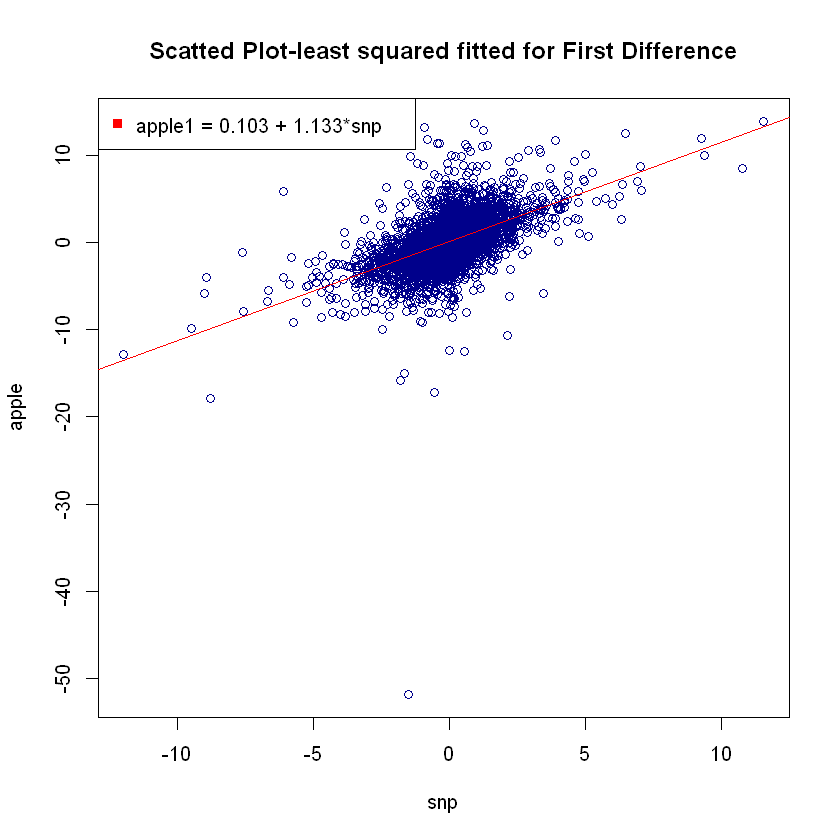

In [22]:
plot.default(snp, apple, col='darkblue')
abline(coef(regressao_df), col='red')
legend('topleft', legend=c(paste0('apple1 = ', round(regressao_df$coefficients[1], 3), ' + ', round(regressao_df$coefficients[2], 3), '*snp')), col=c('red'), pch=15)
title('Scatted Plot-least squared fitted for First Difference')

In [23]:
paste0('SSE apple vs snp: ', sum(regressao_df$residuals))

[1] "SSE apple vs snp: -4.01303990038571e-13"

In [24]:
paste0('SSE apple vs dj: ', sum(regressao_df2$residuals))

[1] "SSE apple vs dj: 1.82742709853301e-13"

To evaluate the goodness of fit of the two models we can check for the scatter plots with the fitted line, the R2, and the sum of the squared errors (SSE). According to all three metrics, the SnP500 appears to be a better hedge for a portfolio that has only apple stocks.

Since the Nasdaq is the tech oriented index of us stocks, it would be interesting to make the same exercise using it.

## *(3)*

H0: intercept = 0

In [25]:
linearHypothesis(regressao_df2,"(Intercept)=0")

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
5229,25725.08,NA,NA,NA,NA
5228,25668.41,1,56.6655,11.54132,0.0006857443


Under the null hypothesis stated above, the p-value provides evidence that we can reject H0.